# Hoja de Trabajo 1

A continuación verá una lista de ejercicios que debe completar para poder entregar la hoja de trabajo 1. Al finalizar, todos sus archivos deben estar contenidos en un archivo ht1-sucarnet.zip. Este archivo debe entregarlo en el link del GES. Por favor cree una carpeta para cada ejercicio que usted realice.

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

# Se carga la imagen y se convierte a formato RGB
img = cv2.imread("monke.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Problema 1

Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color. La función debe devolver una imágen la cual tenga activos los canales de color según los siguientes puntos:

- Si el parámetro "color" vale 1, la imagen debe mostrar activo el color azul
- Si el parámetro "color" vale 2, la imagen debe mostrar activo el color verde
- Si el parámetro "color" vale 3, la imagen debe mostrar activo el color rojo
- Si el parámetro "color" vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde
- Si el parámetro "color" vale 20, la imagen debe mostrar activos únicamente los colores verde y azul
- Si el parámetro "color" vale 30, la imagen debe mostrar activos únicamente los colores azul y rojo

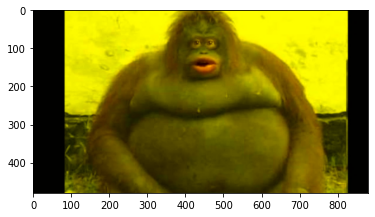

In [20]:
# Función descrita en el documento
def CanalesColor(img, color):

    # Se copian los datos de "img"
    output_img = img.copy()

    # Solo azul
    if color == 1:
        output_img[:,:,0] = 0
        output_img[:,:,1] = 0
    
    # Solo verde
    elif color == 2:
        output_img[:,:,0] = 0
        output_img[:,:,2] = 0

    # Solo rojo
    elif color == 3:
        output_img[:,:,1] = 0
        output_img[:,:,2] = 0
    
    # Todos menos azul
    elif color == 10:
        output_img[:,:,2] = 0

    # Todos menos rojo
    elif color == 20:
        output_img[:,:,0] = 0
    
    # Todos menos verde
    elif color == 30:
        output_img[:,:,1] = 0

    else:
        raise(Exception("Valor inválido para 'color'"))

    return output_img

# Se prueba la función creada desplegando los resultados
img_procesada = CanalesColor(img, 10)
plt.imshow(img_procesada)


## Problema 2

En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises, estas imágenes fueron creadas utilizando una escala de grises en 3D, cree una función que dadas las 3 imágenes se construya la imagen original a color

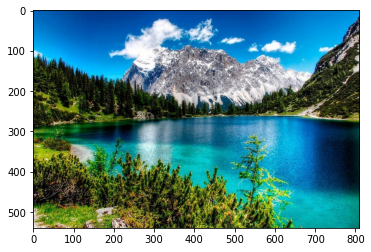

In [24]:
def UnirCanales(R, G, B):

    # Se convierten las imágenes de entrada a codificación RGB
    R = cv2.cvtColor(R, cv2.COLOR_BGR2RGB)
    G = cv2.cvtColor(G, cv2.COLOR_BGR2RGB)
    B = cv2.cvtColor(B, cv2.COLOR_BGR2RGB)

    # Se extraen los canales "útiles" de cada imagen base
    R = R[:,:,0]
    G = G[:,:,1]
    B = B[:,:,2]

    # Se copian los datos del primer canal de color
    output_img = R.copy()

    # Se agregan los dos canales adicionales de color a la matriz tridimensional
    return np.dstack((output_img, G, B))

# Se carga cada canal de color
img_R = cv2.imread("imagen1/imagen1_salida_gray_rojo.jpg")
img_G = cv2.imread("imagen1/imagen1_salida_gray_verde.jpg")
img_B = cv2.imread("imagen1/imagen1_salida_gray_azul.jpg")

# Se prueba la función creada desplegando los resultados
img_construida = UnirCanales(img_R, img_G, img_B)
plt.imshow(img_construida)


## Problema 3

Cree una función que dada una imagen, cree una imagen en escala de grises para cada uno de los tres canales de color. Para entregar este ejercicio debe incluir cada una de las imágenes que haya utilizado como prueba y el resultado de las mismas, no puede utilizar la imagen del problema 2.


In [41]:
def SplitCanales(img_str):

    import os

    # Se carga la imagen con el nombre almacenado en "img_str"
    img = cv2.imread(img_str)

    # Se convierte la imagen a codificación RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Se crea un array de ceros con la forma de la imagen
    out_R = np.zeros_like(img)
    out_G = out_R.copy()
    out_B = out_R.copy()

    # Se guardan los datos de cada canal correspondiente
    out_R[:,:,0] = img[:,:,0]
    out_G[:,:,1] = img[:,:,1]
    out_B[:,:,2] = img[:,:,2]

    # Se obtiene el nombre y la extensión de la imagen original
    filename, extension = os.path.splitext(img_str)

    # Se crea un folder con el nombre de la imagen
    try: 
        os.mkdir(filename)
    except:
        pass
    
    # Se convierten las imágenes a escala de grises
    out_R = cv2.cvtColor(out_R, cv2.COLOR_BGR2GRAY)
    out_G = cv2.cvtColor(out_G, cv2.COLOR_BGR2GRAY)
    out_B = cv2.cvtColor(out_B, cv2.COLOR_BGR2GRAY)

    # Se guarda cada canal en una imagen
    cv2.imwrite(f"{filename}/R.jpg", out_R)
    cv2.imwrite(f"{filename}/G.jpg", out_G)
    cv2.imwrite(f"{filename}/B.jpg", out_B)

    print("Separación de canales exitosa!")


# Se prueba la función creada
SplitCanales("monke.jpg")

Separación de canales exitosa!


## Problema 4

Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones de OpenCV). Sus histogramas deben incluir una línea vertical la cual muestre el valor de la media de la distribución.

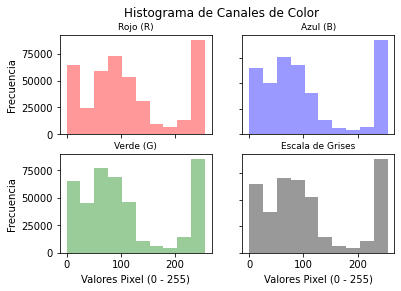

In [67]:
def HistCanales(img_str):

    # Se carga la imagen con el nombre almacenado en "img_str"
    img = cv2.imread(img_str)

    # Se convierte la imagen a codificación RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Se obtiene el promedio aritmético para la escala de grises
    gray = np.mean(img, axis = 2)

    # Se generan los histogramas para cada color
    fig, axs = plt.subplots(2, 2)
    axs[0,0].hist(img[:,:,0].flatten('F'), color = "red", alpha = 0.4)
    axs[0,0].set_title("Rojo (R)", fontsize = 9)
    axs[1,0].hist(img[:,:,1].flatten('F'), color = "green", alpha = 0.4)
    axs[1,0].set_title("Verde (G)", fontsize = 9)
    axs[0,1].hist(img[:,:,2].flatten('F'), color = "blue", alpha = 0.4)
    axs[0,1].set_title("Azul (B)", fontsize = 9)
    axs[1,1].hist(gray.flatten('F'), color = "black", alpha = 0.4)
    axs[1,1].set_title("Escala de Grises", fontsize = 9)

    # Título de todo el gráfico
    fig.suptitle("Histograma de Canales de Color")

    # Se le coloca labels a cada gráfica
    for ax in axs.flat:
        ax.set(xlabel='Valores Pixel (0 - 255)', ylabel='Frecuencia')

    # Se eliminan las labels para los plots a la derecha
    for ax in axs.flat:
        ax.label_outer()
    
    plt.show()

# Se prueba la función creada
HistCanales("monke.jpg")

## Problema 6

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio. Para entregar este ejercicio puede hacer uso de un archivo PDF

![RGB](hsv/espacioRGB.PNG)
![HSV](hsv/espacioHSV.PNG)

### Definición

El espacio de color HSV consiste de un espacio cilíndrico que mapea los colores del espacio RGB (un espacio de color cúbico) a una representación más fácilmente comprensible por humanos. En lugar de que las dimensiones del espacio sean los niveles de rojo, verde y azul de la imagen, este utiliza como dimensiones el tono, saturación y valor del color, principios básicos que han sido enseñados a artistas por muchos años (a través del sistema de colores de Munsell).

- Tono (Hue): Tonalidad o ángulo del color. Un ángulo de 0° resulta en rojo, uno de 120° resulta en verde y uno de 240° resulta en azul
- Saturación (Saturation): Cantidad de color utilizada. Una saturación total consistirá del color más puro posible, mientras que una saturación nula será equivalente a una escala de grises.
- Valor (Value): Claridad del color. Un color con valor nulo es negro, mientras que uno con valor máximo no tendrá nada de negro mezclado. También llamado "brightness".

Cabe mencionar que cada una de estas dimensiones no son dependientes las unas de las otras. 

### Mapeo

Para transformar o mapear los colores del espacio RGB a HSV se deben seguir los siguientes pasos

1. Se dividen todos los canales (R, G, B) entre 255

<br>

2. Se calcula el valor máximo, mínimo y la diferencia entre estos valores para cada pixel

    - cmax = max(R,G,B)
    - cmin = min(R,G,B)
    - diff = cmax - cmin

<br>

3. Cálculo para Hue (h):

    - Si cmax = cmin = 0, entonces h = 0
    - Si cmax = R, entonces h = (60*((G - B) / diff) + 360) % 360
    - Si cmax = G, entonces h = (60*((B - R) / diff) + 120) % 360
    - Si cmax = B, entonces h = (60*((R - G) / diff) + 240) % 360

<br>

4. Cálculo para Saturación (s):

    - Si cmax = 0, entonces s = 0
    - Si cmax != 0, entonces s = (diff / cmax) * 100

<br>

5. Cálculo para Valor (v):

    - v = cmax * 100
